## Objective

1. Plot results to compare performence of three datasets
    1. word embedding result gave by highest classifier
    2. traditional feature result gave by  hig
    3. ML classifier performence

### Summary of feature algorithm results for df_A


In [12]:
## Read result csv files
w2v = pd.read_csv('word2vec_df_A.csv',sep='\t')
bow = pd.read_csv('bow_word_df_A.csv',sep='\t')
bow_char = pd.read_csv('bow_char_df_A.csv',sep='\t')
tfidf_word = pd.read_csv('tfidf_char_df_A.csv',sep='\t')
tfidf_char = pd.read_csv('tfidf_word_df_A.csv',sep='\t')

In [32]:
import pandas as pd
df_ML = pd.DataFrame(index =['BOW','Char n-gram','TFIDF word','TFIDF char','W2V CBOW','W2V skip-gram'] ,columns=['LR','SVM', 'NB','RF'])
df_ML

,LR,SVM,NB,RF
BOW,NaN,NaN,NaN,NaN
Char n-gram,NaN,NaN,NaN,NaN
TFIDF word,NaN,NaN,NaN,NaN
TFIDF char,NaN,NaN,NaN,NaN
W2V CBOW,NaN,NaN,NaN,NaN
W2V skip-gram,NaN,NaN,NaN,NaN


In [18]:
bow

,Model,Accuracy,F1-score,Recall,Precision,AUC
0,LR,0.830928,0.699634,0.632450,0.782787,0.776555
1,SVM_linear,0.816495,0.698305,0.682119,0.715278,0.779682
2,NB,0.611856,0.517617,0.668874,0.422153,0.627476
3,RF,0.836598,0.689520,0.582781,0.844125,0.767064


In [13]:
w2v

,Model,Accuracy,F1-score,Recall,Precision,AUC
0,LR+W2V skipgram,0.711489,0.265092,0.167219,0.639241,0.562293
1,SVC linear+W2V skipgram,0.700155,0.093458,0.049669,0.789474,0.521843
2,NB+W2V skipgram,0.497682,0.502297,0.814570,0.363100,0.584547
3,RF+W2V skipgram,0.717671,0.267380,0.165563,0.694444,0.566327
4,LR+W2V CBOW,0.718187,0.346476,0.240066,0.622318,0.587124
5,SVC linear+W2V CBOW,0.704276,0.140719,0.077815,0.734375,0.532550
6,NB+W2V CBOW,0.487378,0.488957,0.788079,0.354430,0.569806
7,RF+W2V CBOW,0.719732,0.284211,0.178808,0.692308,0.571453


In [40]:
df_ML.iloc[0]=bow.loc[:,'F1-score']*100
df_ML.iloc[1]=bow_char.loc[:,'F1-score']*100
df_ML.iloc[2]=tfidf_word.loc[:,'F1-score']*100
df_ML.iloc[3]=tfidf_char.loc[:,'F1-score']*100
df_ML.iloc[5] = w2v.loc[:3,'F1-score']*100
df_ML.iloc[4] =w2v.loc[4:,'F1-score']*100
df_ML.to_csv('summary_chart.csv',index_label="Feature")
df_ML

,LR,SVM,NB,RF
BOW,69.9634,69.8305,51.7617,68.952
Char n-gram,73.7027,71.0813,46.4539,72.7273
TFIDF word,62.8009,73.2824,43.699,71.8101
TFIDF char,61.1588,71.0623,48.18,68.1452
W2V CBOW,34.6476,14.0719,48.8957,28.4211
W2V skip-gram,26.5092,9.3458,50.2297,26.738


In [42]:
df_M= pd.read_csv('summary_chart.csv',index_col='Feature')
df_M

,LR,SVM,NB,RF
Feature,,,,
BOW,69.9634,69.8305,51.7617,68.9520
Char n-gram,73.7027,71.0813,46.4539,72.7273
TFIDF word,62.8009,73.2824,43.6990,71.8101
TFIDF char,61.1588,71.0623,48.1800,68.1452
W2V CBOW,34.6476,14.0719,48.8957,28.4211
W2V skip-gram,26.5092,9.3458,50.2297,26.7380


### Plot ML summary

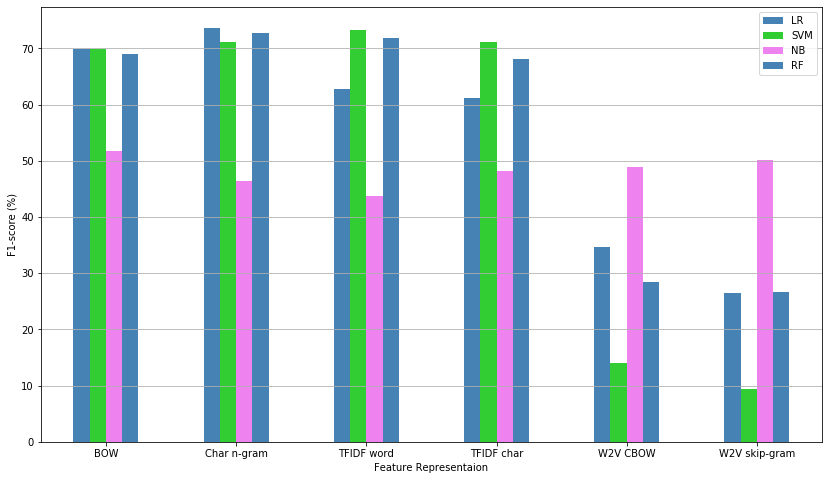

<Figure size 432x288 with 0 Axes>

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
df_M.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Feature Representaion')
plt.ylabel('F1-score (%)')
plt.grid(axis='y')

f1_score = df_M.values.flatten()


plt.show()
plt.savefig('summary_of_ML_results.png')

In [ ]:
plt.figure(figsize=(10, 8))
df_M.reset_index()
splot=sns.barplot(x="Education", y="mean_salary", hue="", data=df_M)
plt.ylabel("Mean Salary in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title("Annotated Grouped Barplot: Gender Bias in Salary", size=18)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.savefig('Annotating_Bars_in_Grouped_Barplot_Seaborn_Matplotlib_try1.png

In [ ]:
plt.figure(figsize=(10, 8))
splot=sns.barplot(x="Education", y="mean_salary", hue="Gender", data=df)
plt.ylabel("Mean Salary in US Dollars", size=14)
plt.xlabel("Education", size=14)
plt.title("Grouped Barplot: Gender Bias in Salary", size=18)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()/1000), '.0f')+"K", 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')

### Plot CNN

In [47]:
import pandas as pd
df_CNN = pd.DataFrame(index =['Gossip Site (A)','Facebook (B)','Combination (A+B)'] ,columns=['Static','Random','Dynamic'])
df_CNN

,Static,Random,Dynamic
Gossip Site (A),NaN,NaN,NaN
Facebook (B),NaN,NaN,NaN
Combination (A+B),NaN,NaN,NaN


In [51]:
2*4

8

In [53]:
df_CNN.iloc[0] = [0.740201*100,0.713472*100,0.695408*100]
df_CNN.iloc[1] = [0.869522*100,0.874814*100,0.871422*100]
df_CNN.iloc[2] = [0.765777*100,0.797522*100,0.803834*100]

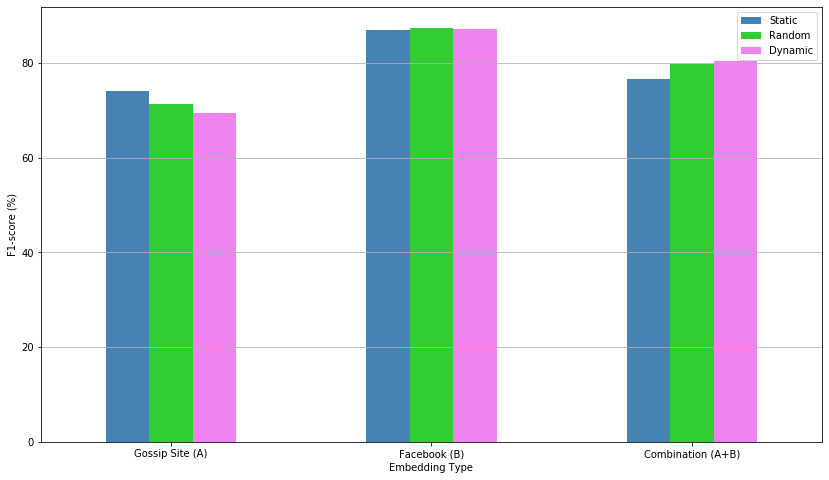

<Figure size 432x288 with 0 Axes>

In [54]:
from matplotlib import pyplot as plt
import seaborn as sns
df_CNN.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Embedding Type')
plt.ylabel('F1-score (%)')
plt.grid(axis='y')

f1_score = df_CNN.values.flatten()


plt.show()
plt.savefig('summary_of_CNN_results.png')

In [ ]:
df_we.plot(kind='bar', figsize=(14, 8), color=['steelblue', 'limegreen', 'violet'])

plt.xticks( rotation=0)
plt.xlabel('Dataset')
plt.ylabel('Average Accuracy (%)')
plt.grid(axis='y')

accuracies = df_we.values.flatten()

plt.annotate(str(round(accuracies[0],1)), xy=(-0.24, accuracies[0]+0.5), color='black')
plt.annotate(str(round(accuracies[1],1)), xy=(-0.08, accuracies[1]+0.5), color='black')
plt.annotate(str(round(accuracies[2],1)), xy=(0.09, accuracies[2]+0.5), color='black')
plt.annotate(str(round(accuracies[3],1)), xy=(0.76, accuracies[3]+0.5), color='black')
plt.annotate(str(round(accuracies[4],1)), xy=(0.92, accuracies[4]+0.5), color='black')
plt.annotate(str(round(accuracies[5],1)), xy=(1.09, accuracies[5]+0.5), color='black')
plt.annotate(str(round(accuracies[6],1)), xy=(1.76, accuracies[6]+0.5), color='black')
plt.annotate(str(round(accuracies[7],1)), xy=(1.92, accuracies[7]+0.5), color='black')
plt.annotate(str(round(accuracies[8],1)), xy=(2.09, accuracies[8]+0.5), color='black')
plt.annotate(str(round(accuracies[9],1)), xy=(2.76, accuracies[9]+0.5), color='black')
plt.annotate(str(round(accuracies[10],1)), xy=(2.92, accuracies[10]+0.5), color='black')
plt.annotate(str(round(accuracies[11],1)), xy=(3.09, accuracies[11]+0.5), color='black')
plt.annotate(str(round(accuracies[12],1)), xy=(3.76, accuracies[12]+0.5), color='black')
plt.annotate(str(round(accuracies[13],1)), xy=(3.92, accuracies[13]+0.5), color='black')
plt.annotate(str(round(accuracies[14],1)), xy=(4.09, accuracies[14]+0.5), color='black')

plt.show()

